In [17]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import joblib

In [18]:
os.chdir("C:/Users/rjnaw/Downloads")

In [19]:
#Data Preproceessing
#Load the Dataset
Mental_Health_1 = pd.read_excel("Mental Health.xlsx")
Mental_Health_1

,Name,1 Age,2. Gender,Emotional well being score,4. Occupation Status,Organisation,Use Socials,Commonly used,Average Activity,Frequency,...,Feel restless when not used,Easily distracted,Bothered by worries,Difficulty to concentrate,Compare yourself to other Successful people,Feeling about these comparisons in general,Seek validation from features,Depressed or down,Interest in daily activities,Issues regarding sleep
0,Aadhya Pillai,21,Male,2,University Student,University,Yes,Facebook,Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,Harry Brown,21,Female,3,University Student,University,Yes,Snapchat,More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,Vivaan Malhotra,21,Female,4,University Student,University,Yes,Twitter,Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,Alexander Young,21,Female,2,University Student,University,Yes,Facebook,More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,Avni Rao,21,Female,5,University Student,University,No,Instagram,Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,Amy Rodriguez,37,Other,1,Student,Enterprise Ltd,Yes,Facebook,1,3,...,4,3,3,3,2,4,2,3,1,2
4997,James Rodriguez,46,Other,1,Unemployed,Services Inc,Yes,Instagram,2,1,...,5,2,1,4,2,4,4,1,2,2
4998,Jane Williams,21,Other,2,Employed,Solutions Ltd,Yes,Twitter,3,3,...,5,1,1,1,1,5,1,4,5,4
4999,Tom Jones,24,Female,3,Self-employed,International Ltd,Yes,Facebook,5,5,...,1,4,1,1,5,5,5,1,5,4


In [20]:
#Copying the Dataset
Mental = Mental_Health_1.copy()
Mental

,Name,1 Age,2. Gender,Emotional well being score,4. Occupation Status,Organisation,Use Socials,Commonly used,Average Activity,Frequency,...,Feel restless when not used,Easily distracted,Bothered by worries,Difficulty to concentrate,Compare yourself to other Successful people,Feeling about these comparisons in general,Seek validation from features,Depressed or down,Interest in daily activities,Issues regarding sleep
0,Aadhya Pillai,21,Male,2,University Student,University,Yes,Facebook,Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,Harry Brown,21,Female,3,University Student,University,Yes,Snapchat,More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,Vivaan Malhotra,21,Female,4,University Student,University,Yes,Twitter,Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,Alexander Young,21,Female,2,University Student,University,Yes,Facebook,More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,Avni Rao,21,Female,5,University Student,University,No,Instagram,Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,Amy Rodriguez,37,Other,1,Student,Enterprise Ltd,Yes,Facebook,1,3,...,4,3,3,3,2,4,2,3,1,2
4997,James Rodriguez,46,Other,1,Unemployed,Services Inc,Yes,Instagram,2,1,...,5,2,1,4,2,4,4,1,2,2
4998,Jane Williams,21,Other,2,Employed,Solutions Ltd,Yes,Twitter,3,3,...,5,1,1,1,1,5,1,4,5,4
4999,Tom Jones,24,Female,3,Self-employed,International Ltd,Yes,Facebook,5,5,...,1,4,1,1,5,5,5,1,5,4


In [21]:
Mental.isnull().sum()

Name                                             0
1 Age                                            0
2. Gender                                        0
Emotional well being score                       0
4. Occupation Status                             0
Organisation                                   400
Use Socials                                      0
Commonly used                                   96
Average Activity                                 0
Frequency                                        0
Distracted when working                          0
Feel restless when not used                      0
Easily distracted                                0
Bothered by worries                              0
Difficulty to concentrate                        0
Compare yourself to other Successful people      0
Feeling about these comparisons in general       0
Seek validation from features                    0
Depressed or down                                0
Interest in daily activities   

In [22]:
for col in ['Organisation', 'Commonly used']:
    Mental[col].fillna(Mental[col].mode()[0], inplace=True)

C:\Users\rjnaw\AppData\Local\Temp\ipykernel_17284\2653659965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Mental[col].fillna(Mental[col].mode()[0], inplace=True)


In [23]:
Mental.isnull().sum()   

Name                                           0
1 Age                                          0
2. Gender                                      0
Emotional well being score                     0
4. Occupation Status                           0
Organisation                                   0
Use Socials                                    0
Commonly used                                  0
Average Activity                               0
Frequency                                      0
Distracted when working                        0
Feel restless when not used                    0
Easily distracted                              0
Bothered by worries                            0
Difficulty to concentrate                      0
Compare yourself to other Successful people    0
Feeling about these comparisons in general     0
Seek validation from features                  0
Depressed or down                              0
Interest in daily activities                   0
Issues regarding sle

In [24]:
#Convert Age to numeric:-
Mental['1 Age'] = pd.to_numeric(Mental['1 Age'], errors='coerce')
Mental['1 Age'].fillna(Mental['1 Age'].mean(), inplace=True)

C:\Users\rjnaw\AppData\Local\Temp\ipykernel_17284\346883925.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Mental['1 Age'].fillna(Mental['1 Age'].mean(), inplace=True)


In [25]:
#Clean column names
Mental.columns = [col.strip().replace('.', '') for col in Mental.columns]

In [26]:
#Remove any extra from column names 
Mental.columns =  Mental.columns.str.strip()
#Convert the column to numeric values
Mental['Emotional well being score'] = pd.to_numeric(Mental['Emotional well being score'], errors='coerce')
#Convert Target Variable:-
Mental['Mental_Health_Risk'] = np.where(Mental['Emotional well being score'] <= 2, 1, 0)
Mental['Mental_Health_Risk']

0       1
1       0
2       0
3       1
4       0
       ..
4996    1
4997    1
4998    1
4999    0
5000    1
Name: Mental_Health_Risk, Length: 5001, dtype: int64

In [27]:
#Set Style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

Data Visualization

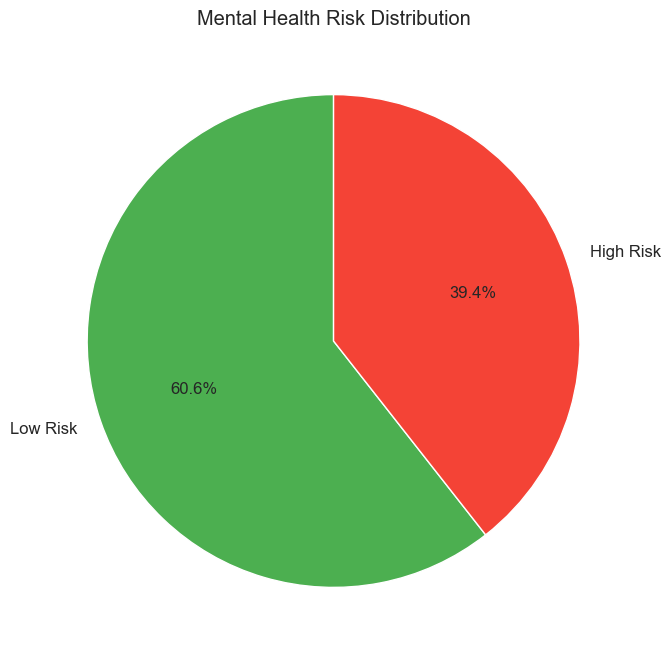

In [40]:
#Mental Health Risk Distribution (Simple Pie Chart)
plt.figure(figsize=(8, 8))
risk_counts = Mental['Mental_Health_Risk'].value_counts()
plt.pie(risk_counts,
        labels = ['Low Risk', 'High Risk'],
                  autopct = '%1.1f%%',
                  colors=['#4CAF50', '#F44336'],
                  startangle=90)
plt.title('Mental Health Risk Distribution')
plt.show()

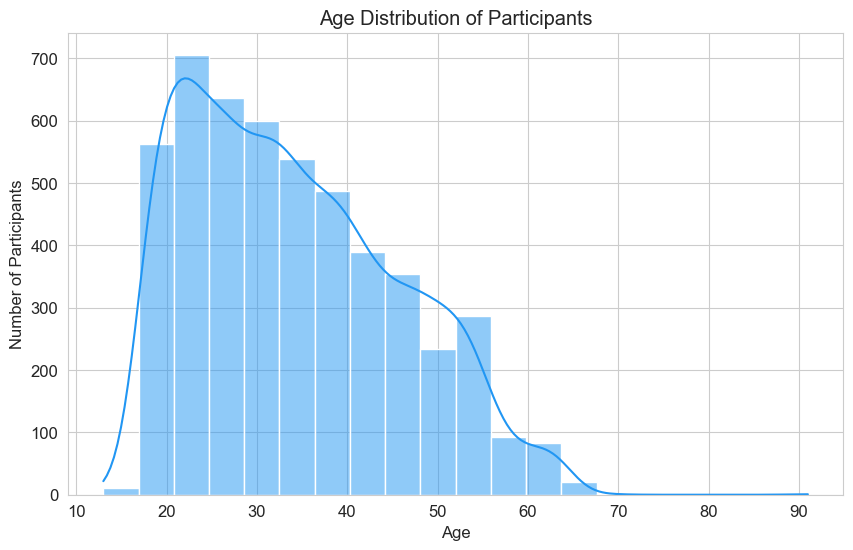

In [ ]:
#Age Distribution 
plt.figure(figsize=(10, 6))
sns.histplot(Mental['1 Age'], bins = 20, color = '#2196F3', kde=True)
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()

C:\Users\rjnaw\AppData\Local\Temp\ipykernel_17284\1016001476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = platform_counts.values, y = platform_counts.index, palette='viridis')


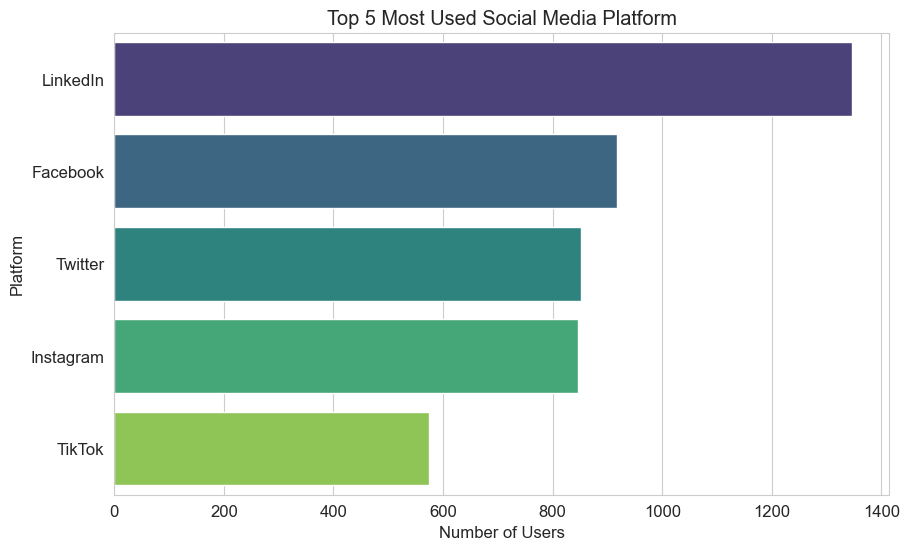

In [42]:
#Social Media Platform Usage
plt.figure(figsize=(10, 6))
platform_counts = Mental['Commonly used'].value_counts().nlargest(5)
sns.barplot(x = platform_counts.values, y = platform_counts.index, palette='viridis')
plt.title("Top 5 Most Used Social Media Platform")
plt.xlabel('Number of Users')
plt.ylabel("Platform")
plt.show()

C:\Users\rjnaw\AppData\Local\Temp\ipykernel_17284\201655897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'Average Activity', data=Mental, order = screen_time_order, palette = 'Blues_r')


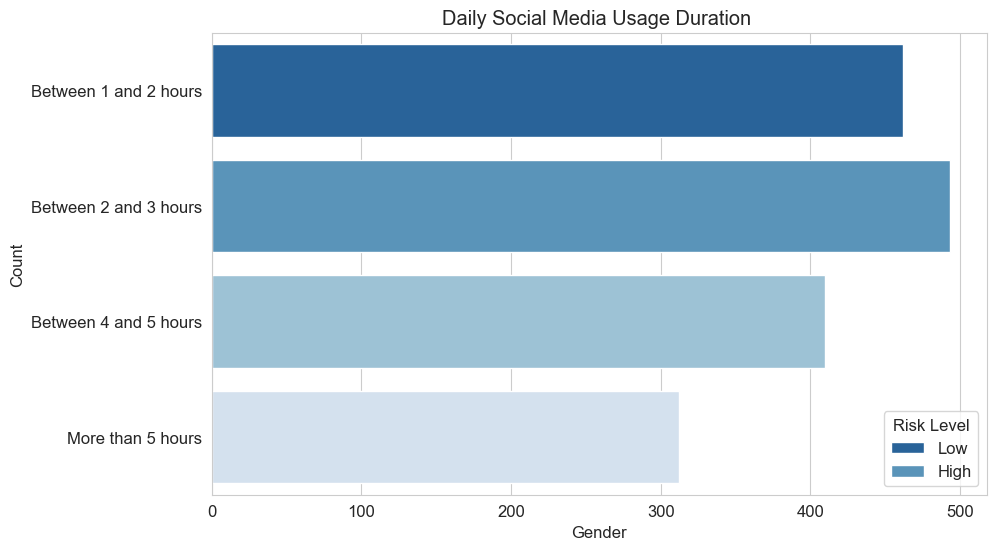

In [44]:
#Screen Time Analysis 
plt.figure(figsize=(10, 6))
screen_time_order = [ 'Between 1 and 2 hours',
                     'Between 2 and 3 hours', 
                     'Between 4 and 5 hours', 'More than 5 hours']
sns.countplot(y = 'Average Activity', data=Mental, order = screen_time_order, palette = 'Blues_r')
plt.title('Daily Social Media Usage Duration ')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Risk Level', labels = ['Low', 'High'])
plt.show()

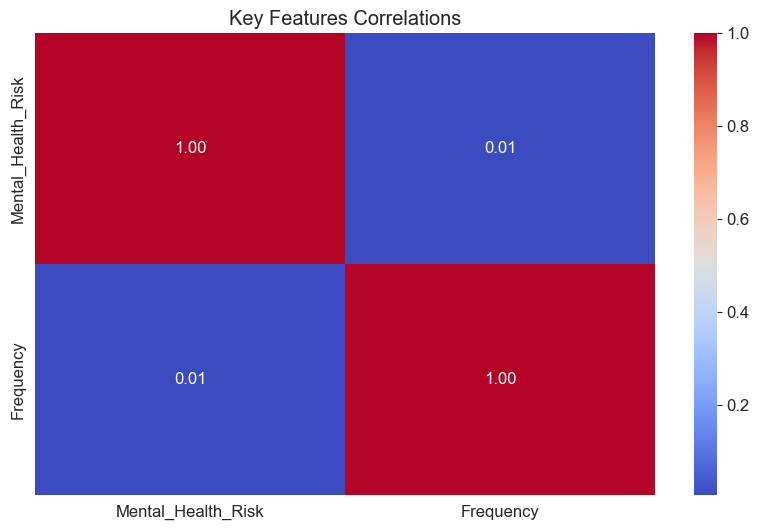

In [50]:
# Convert 'Frequency' to numeric
Mental['Frequency'] = pd.to_numeric(Mental['Frequency'], errors='coerce') 
#Features Correlations
plt.figure(figsize=(10, 6))
corr_matrix = Mental[['Mental_Health_Risk', 'Frequency',]].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Key Features Correlations")
plt.show()

In [35]:
#Handle numerical features:-
numerical_features = ['1 Age']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')) ,
    ('scaler', StandardScaler())
])

In [36]:
#Handle categorical features:-
categorical_features =['2 Gender', '4 Occupation Status', 'Organisation','Commonly used']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [37]:
#Combine preprocessing 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features) ,
        ('cat', categorical_transformer, categorical_features)
    ])

In [51]:
#Feature Engineering:- 
activity_mapping = {
    'Less than an hour': 1,
    'Between 1 and 2 hours': 2,
    'Between 2 and 3 hours' : 3,
    'Between 3 and 4 hours' : 4,
    'More than 5 hours' : 6
}
Mental['Screen_Time_Score'] = Mental['Average Activity'].map(activity_mapping)


Model Deployment

In [53]:
#Prepare data
X = Mental[['1 Age', '2 Gender', '4 Occupation Status', 'Organisation',
           'Commonly used', 'Screen_Time_Score']]
y = Mental['Mental_Health_Risk']

In [54]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [56]:
#Create Pipeline
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators = 100,
        class_weight = 'balanced',
        random_state= 42
    ))
])

In [57]:
#Train Model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['1 Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['2 Gender',
                                                   '4 Occupation Status',
                                                   'Organisation',
                                                   'Commonly used'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

Model Evaluation

In [58]:
#Generate Prediction:-
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [59]:
#Print Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.2f}")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

Accuracy: 0.55
ROC AUC: 0.52

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       909
           1       0.42      0.38      0.40       592

    accuracy                           0.55      1501
   macro avg       0.52      0.52      0.52      1501
weighted avg       0.54      0.55      0.55      1501



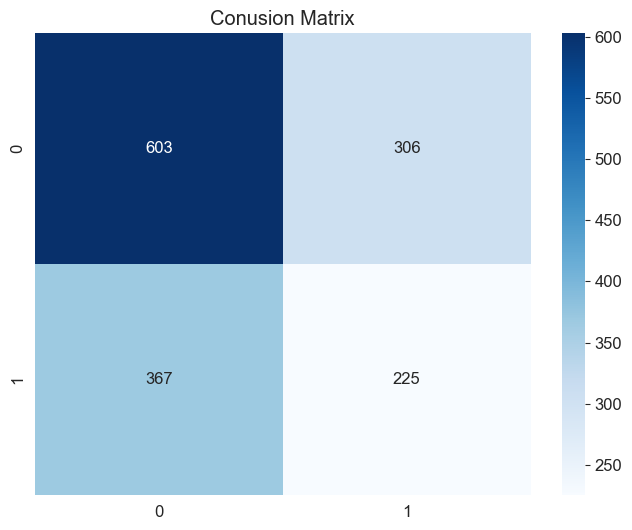

In [60]:
#Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Conusion Matrix')
plt.show()